In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?year=2016&query_text=fire&$order=query_count'

In [4]:
response = requests.get(endpoint)

In [5]:
response

<Response [200]>

In [6]:
result = response.json()

1. Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?  

In [7]:
result

[{'month_name': 'January',
  'year': '2016',
  'query_count': '19',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'December',
  'year': '2016',
  'query_count': '38',
  'query_te

August has the most queries at 47

2. Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?  

In [8]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=10000&$where=query_count>100'

In [9]:
response = requests.get(endpoint)

In [10]:
response

<Response [200]>

In [11]:
result = response.json()
len(result)

1262

There are 1,262 months with over 100 queries

3. Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur? 

In [12]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=1500&$where=query_count>100&query_text=codes'

In [13]:
response = requests.get(endpoint)

In [14]:
response

<Response [200]>

In [15]:
result = response.json()
len(result)

56

There are 56 months where codes was searched over 100 times.

4. Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [16]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=50000'

In [17]:
response = requests.get(endpoint)

In [18]:
response

<Response [200]>

In [19]:
result = response.json()
len(result)

43677

In [20]:
pd.json_normalize(result)

,month_name,year,query_count,query_text,month
0,January,2014,223,ebid,NaN
1,January,2014,112,property maps,NaN
2,January,2014,97,maps,NaN
3,January,2014,90,property tax,NaN
4,January,2014,76,jobs,NaN
...,...,...,...,...,...
43672,July,2021,8,sign ordinance,7
43673,July,2021,8,snap,7
43674,July,2021,8,small business,7
43675,July,2021,8,water department,7


In [21]:
socat_df = pd.json_normalize(result)

In [22]:
maps_df = socat_df[socat_df['query_text'] == 'maps']
maps_df.head()

,month_name,year,query_count,query_text,month
2,January,2014,97,maps,NaN
503,February,2014,140,maps,NaN
1005,March,2014,144,maps,NaN
1503,April,2014,152,maps,NaN
2003,May,2014,119,maps,NaN


In [23]:
drop_df = maps_df[['month_name', 'query_count']].copy()
drop_df

,month_name,query_count
2,January,97
503,February,140
1005,March,144
1503,April,152
2003,May,119
...,...,...
39196,November,86
39688,December,113
41188,March,132
41683,April,148


In [24]:
drop_df.sort_values(by=['query_count'], ascending = False)
drop_df

,month_name,query_count
2,January,97
503,February,140
1005,March,144
1503,April,152
2003,May,119
...,...,...
39196,November,86
39688,December,113
41188,March,132
41683,April,148


In [25]:
drop_df['query_count'] = pd.to_numeric(drop_df['query_count'])

In [26]:
drop_df.groupby('month_name').sum()

,query_count
month_name,
April,1309
August,991
December,556
February,832
January,924
July,1062
June,1216
March,1090
May,1019


In [27]:
count_df = drop_df.groupby('month_name').sum().reset_index()

In [28]:
count_df

,month_name,query_count
0,April,1309
1,August,991
2,December,556
3,February,832
4,January,924
5,July,1062
6,June,1216
7,March,1090
8,May,1019
9,November,805


In [29]:
sort_order=['January','February','March','April','May','June',
            'July','August','September','October','November','December']

In [30]:
count_df.index=pd.CategoricalIndex(count_df['month_name'],categories=sort_order,ordered=True)

In [31]:
count_df=count_df.sort_index().reset_index(drop=True)
count_df

,month_name,query_count
0,January,924
1,February,832
2,March,1090
3,April,1309
4,May,1019
5,June,1216
6,July,1062
7,August,991
8,September,951
9,October,981


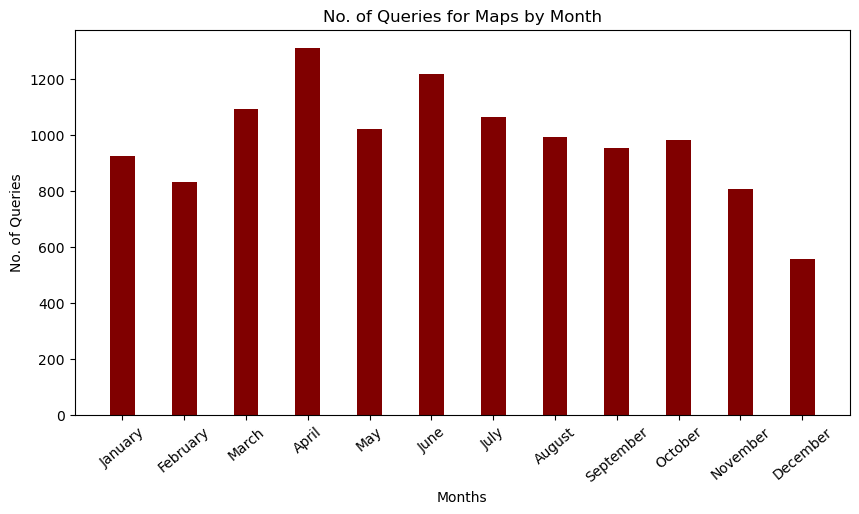

In [32]:
months = list(count_df.month_name)
queries = list(count_df.query_count)

fig = plt.figure(figsize = (10, 5))
plt.bar(months, queries, color ='maroon', 
        width = 0.4)

plt.xlabel("Months")
plt.ylabel("No. of Queries")
plt.xticks(rotation=40)
plt.title("No. of Queries for Maps by Month")
plt.show()